In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer

In [52]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# a new layer that rescales/normalizes the activations after each layer.
# has a weak regularization effect. also allows 

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

from keras.preprocessing.image import ImageDataGenerator

In [53]:
train_dir = 'Data/mel_train'

test_dir = 'Data/mel_test'

In [5]:
train_data_gen = ImageDataGenerator(rescale = 1./255, validation_split = .2)

train_generator = train_data_gen.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',)

Found 5240 images belonging to 10 classes.


In [6]:
val_data_gen = ImageDataGenerator(rescale=1./255)

validation_generator = train_data_gen.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',)

Found 1309 images belonging to 10 classes.


In [7]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

Found 2183 images belonging to 10 classes.


In [ ]:
model2 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-3) ))

# max pool in 2x2 window
model2.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3)))
model2.add(Dropout(0.25))



# transition to dense fully-connected part of network
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))

model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.65))

model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn_2 = model2.fit(train_generator, validation_data = validation_generator, epochs = 25,)

In [8]:
model2 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model2.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-4) ))

# max pool in 2x2 window
model2.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model2.add(Dropout(0.2))


model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model2.add(Dropout(0.2))

# transition to dense fully-connected part of network
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))

model2.add(BatchNormalization())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.7))

model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [9]:
history_cnn_2 = model2.fit(train_generator, validation_data = validation_generator, epochs = 25,)

Epoch 1/25
164/164 [==============================] - 41s 248ms/step - loss: 2.3099 - accuracy: 0.2109 - val_loss: 1.9559 - val_accuracy: 0.3308
Epoch 2/25
164/164 [==============================] - 38s 234ms/step - loss: 1.9229 - accuracy: 0.3347 - val_loss: 1.7822 - val_accuracy: 0.3667
Epoch 3/25
164/164 [==============================] - 39s 237ms/step - loss: 1.7266 - accuracy: 0.3880 - val_loss: 1.6224 - val_accuracy: 0.3980
Epoch 4/25
164/164 [==============================] - 40s 245ms/step - loss: 1.5743 - accuracy: 0.4487 - val_loss: 1.9181 - val_accuracy: 0.3621
Epoch 5/25
164/164 [==============================] - 40s 242ms/step - loss: 1.4570 - accuracy: 0.5050 - val_loss: 1.2960 - val_accuracy: 0.5386
Epoch 6/25
164/164 [==============================] - 38s 233ms/step - loss: 1.3265 - accuracy: 0.5573 - val_loss: 1.2953 - val_accuracy: 0.5668
Epoch 7/25
164/164 [==============================] - 38s 232ms/step - loss: 1.2692 - accuracy: 0.5920 - val_loss: 1.2189 - val_ac

In [10]:
model2.save('saved_models/cnn_model_2')


INFO:tensorflow:Assets written to: saved_models/cnn_model_2/assets


INFO:tensorflow:Assets written to: saved_models/cnn_model_2/assets


In [11]:
new_model = models.load_model('saved_models/cnn_model_2')

In [18]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 34, 34, 64)        0

In [19]:
_, test_acc = model2.evaluate(test_generator)

69/69 [==============================] - 9s 127ms/step - loss: 0.8411 - accuracy: 0.8085


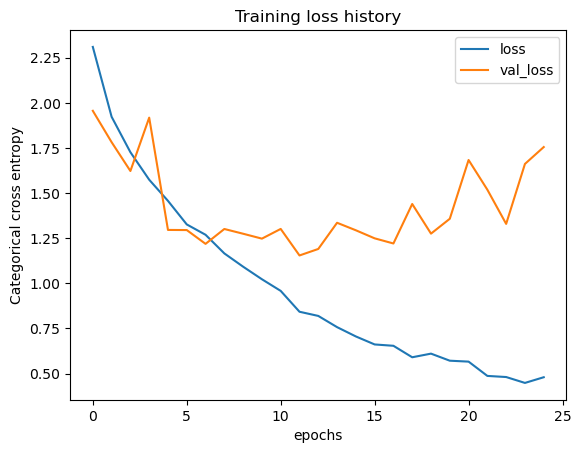

In [20]:
train_cnn_history = pd.DataFrame(history_cnn_2.history)
train_cnn_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_cnn_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

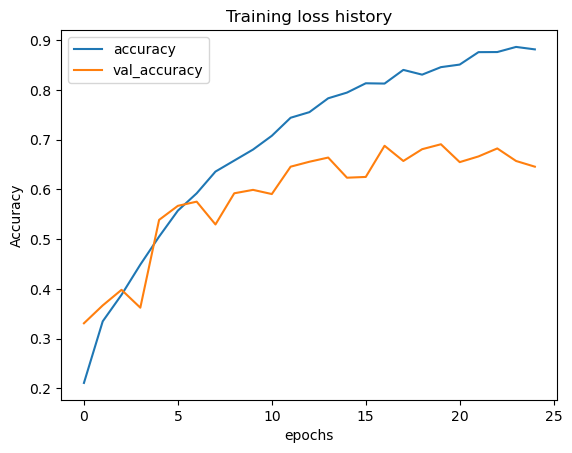

In [21]:
col_list = ['accuracy', 'val_accuracy']
train_cnn_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

In [22]:
predictions = model2.predict(test_generator)

69/69 [==============================] - 9s 128ms/step


In [23]:
predicted_labels = [np.argmax(pred) for pred in predictions]

In [24]:
true_labels = test_generator.classes

In [25]:
accuracy = np.mean(np.array(predicted_labels) == true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8085203847915712


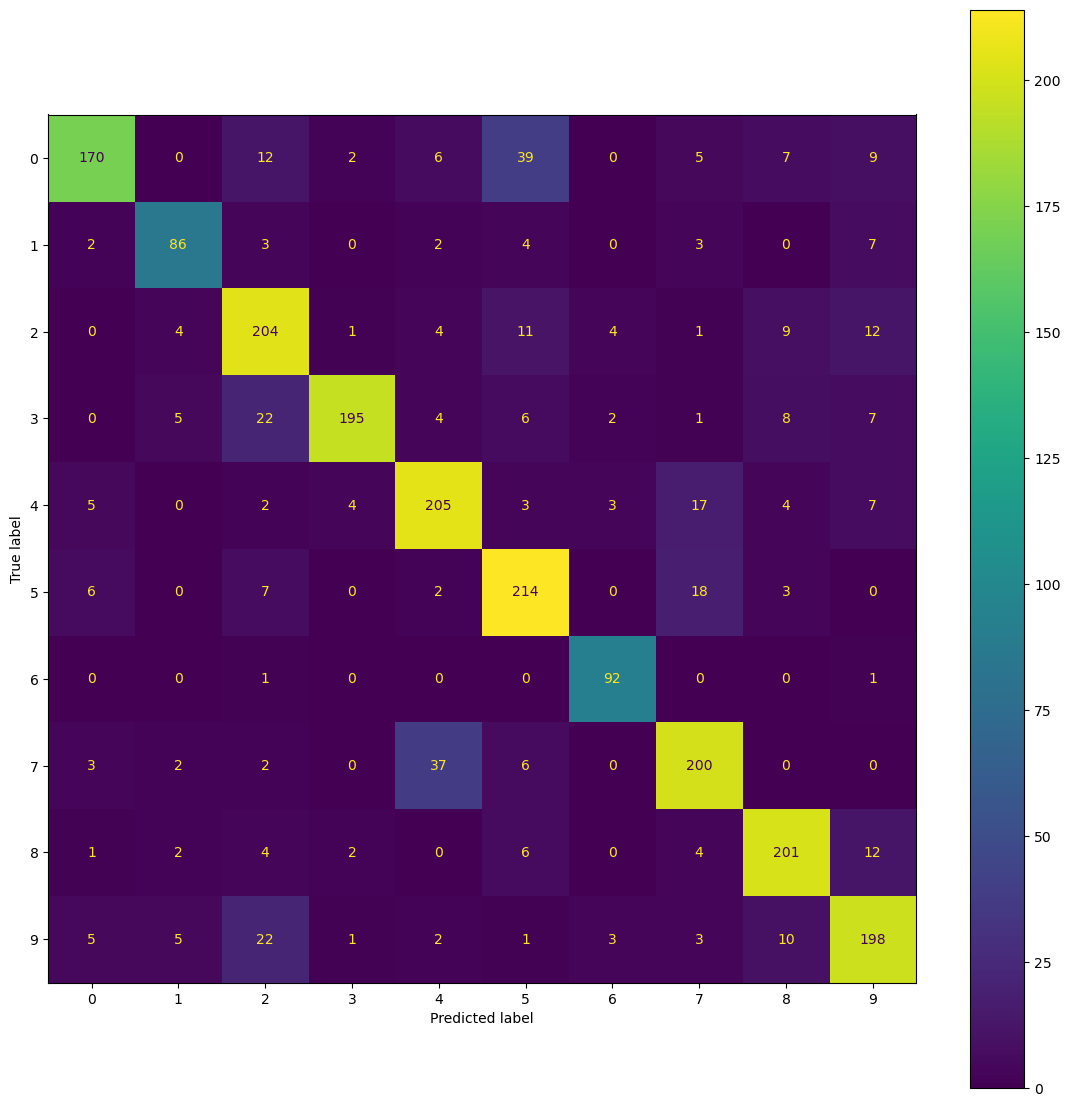

In [26]:
fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, ax = ax);

In [27]:
class_labels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 
               'gun_shot', 'jackhammer', 'siren', 'street_music']

In [28]:
y_true_labeled = []
y_pred_labeled = []

for label in true_labels:
    y_true_labeled.append(class_labels[label])

for label in predicted_labels:
    y_pred_labeled.append(class_labels[label])
    

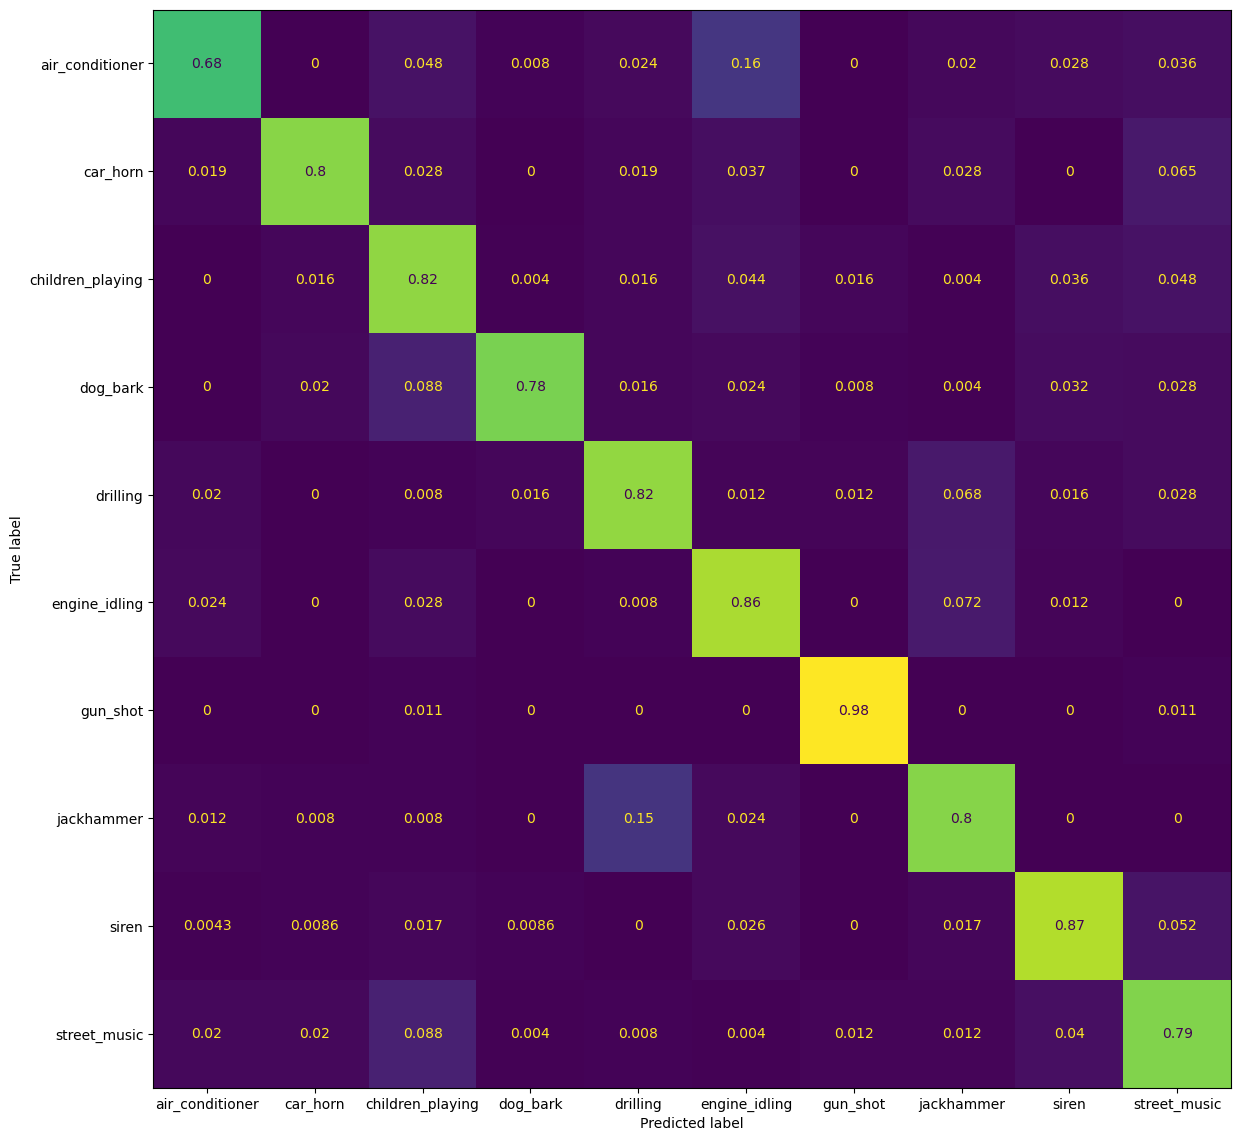

In [29]:
fig, ax = plt.subplots(figsize = (14,14))

ConfusionMatrixDisplay.from_predictions(y_true_labeled, y_pred_labeled, 
                                        normalize = 'true', colorbar=False, labels = class_labels, ax = ax);

### Model 3 With Stronger Regularization

In [30]:
model3 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model3.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-3) ))

# max pool in 2x2 window
model3.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3)))
model3.add(Dropout(0.2))

model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-3)))
model3.add(Dropout(0.25))

# transition to dense fully-connected part of network
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.35))

model3.add(BatchNormalization())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.7))

model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [31]:
history_cnn_3 = model3.fit(train_generator, validation_data = validation_generator, epochs = 35)

Epoch 1/35
164/164 [==============================] - 41s 244ms/step - loss: 2.7860 - accuracy: 0.1752 - val_loss: 2.3945 - val_accuracy: 0.2200
Epoch 2/35
164/164 [==============================] - 40s 243ms/step - loss: 2.2624 - accuracy: 0.2368 - val_loss: 2.3762 - val_accuracy: 0.1704
Epoch 3/35
164/164 [==============================] - 41s 249ms/step - loss: 2.1188 - accuracy: 0.2525 - val_loss: 2.4361 - val_accuracy: 0.2193
Epoch 4/35
164/164 [==============================] - 40s 244ms/step - loss: 2.0310 - accuracy: 0.2687 - val_loss: 2.2079 - val_accuracy: 0.2353
Epoch 5/35
164/164 [==============================] - 40s 241ms/step - loss: 1.9708 - accuracy: 0.2739 - val_loss: 2.2387 - val_accuracy: 0.1833
Epoch 6/35
164/164 [==============================] - 40s 241ms/step - loss: 1.8944 - accuracy: 0.3027 - val_loss: 1.8580 - val_accuracy: 0.3782
Epoch 7/35
164/164 [==============================] - 41s 249ms/step - loss: 1.8639 - accuracy: 0.3271 - val_loss: 2.0809 - val_ac

In [41]:
model3.save('saved_models/cnn_model_3.h5')

In [42]:
new_model_3 = models.load_model('saved_models/cnn_model_3.h5')

In [43]:
new_model_3

In [ ]:
model4 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model4.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(7e-4) ))

# max pool in 2x2 window
model4.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model4.add(Dropout(0.2))

model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model4.add(Dropout(0.25))

# transition to dense fully-connected part of network
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.3))

model4.add(BatchNormalization())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.65))

model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [ ]:
history_cnn_4 = model4.fit(train_generator, validation_data = validation_generator, epochs = 30)

### Tried Chaning the Train/Validation Split from 80/20 to 70/30

In [5]:
train_data_gen_2 = ImageDataGenerator(rescale = 1./255, validation_split = .3)

train_generator_2 = train_data_gen_2.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',)

Found 4585 images belonging to 10 classes.


In [6]:
val_data_gen_2 = ImageDataGenerator(rescale=1./255)

validation_generator_2 = train_data_gen_2.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',)

Found 1964 images belonging to 10 classes.


In [7]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

Found 2183 images belonging to 10 classes.


In [10]:
model4 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model4.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-4) ))

# max pool in 2x2 window
model4.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model4.add(Dropout(0.2))


model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model4.add(Dropout(0.2))

# transition to dense fully-connected part of network
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.25))

model4.add(BatchNormalization())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.6))

model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [11]:
history_cnn_4 = model4.fit(train_generator_2, validation_data = validation_generator_2, epochs = 35)

Epoch 1/35
144/144 [==============================] - 41s 279ms/step - loss: 2.2916 - accuracy: 0.1917 - val_loss: 2.1903 - val_accuracy: 0.2587
Epoch 2/35
144/144 [==============================] - 38s 261ms/step - loss: 2.0339 - accuracy: 0.2674 - val_loss: 2.2093 - val_accuracy: 0.2510
Epoch 3/35
144/144 [==============================] - 38s 263ms/step - loss: 1.9355 - accuracy: 0.3034 - val_loss: 2.0890 - val_accuracy: 0.2363
Epoch 4/35
144/144 [==============================] - 39s 271ms/step - loss: 1.8548 - accuracy: 0.3265 - val_loss: 1.8890 - val_accuracy: 0.3559
Epoch 5/35
144/144 [==============================] - 39s 272ms/step - loss: 1.7158 - accuracy: 0.3725 - val_loss: 1.7523 - val_accuracy: 0.3936
Epoch 6/35
144/144 [==============================] - 38s 262ms/step - loss: 1.5819 - accuracy: 0.4281 - val_loss: 1.5573 - val_accuracy: 0.4644
Epoch 7/35
144/144 [==============================] - 38s 263ms/step - loss: 1.5017 - accuracy: 0.4696 - val_loss: 1.7437 - val_ac

In [13]:
model4.save('saved_models/cnn_model_4.h5')

In [22]:
(pd.DataFrame(history_cnn_4.history)).to_pickle("saved_models/train_cnn_history_4.pkl")  

NameError: name 'history_cnn_4' is not defined

In [ ]:
train_cnn_history_5 = pd.DataFrame(history_cnn_5.history)

In [ ]:
history_cnn_4

In [8]:
model5 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model5.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-4) ))

# max pool in 2x2 window
model5.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model5.add(Dropout(0.2))


model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model5.add(Dropout(0.25))

# transition to dense fully-connected part of network
model5.add(Flatten())
model5.add(Dense(64, activation='relu'))
model5.add(Dropout(0.25))

model5.add(BatchNormalization())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.7))

model5.add(Dense(10, activation='softmax'))

model5.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [9]:
history_cnn_5 = model5.fit(train_generator_2, validation_data = validation_generator_2, epochs = 35)

Epoch 1/35
144/144 [==============================] - 43s 298ms/step - loss: 2.3386 - accuracy: 0.1948 - val_loss: 2.1630 - val_accuracy: 0.2413
Epoch 2/35
144/144 [==============================] - 40s 274ms/step - loss: 2.0969 - accuracy: 0.2567 - val_loss: 2.4994 - val_accuracy: 0.1792
Epoch 3/35
144/144 [==============================] - 39s 272ms/step - loss: 2.0888 - accuracy: 0.2473 - val_loss: 1.9732 - val_accuracy: 0.3737
Epoch 4/35
144/144 [==============================] - 40s 275ms/step - loss: 1.9420 - accuracy: 0.3104 - val_loss: 1.8156 - val_accuracy: 0.4022
Epoch 5/35
144/144 [==============================] - 42s 287ms/step - loss: 1.8214 - accuracy: 0.3505 - val_loss: 1.7346 - val_accuracy: 0.4414
Epoch 6/35
144/144 [==============================] - 40s 276ms/step - loss: 1.7536 - accuracy: 0.3712 - val_loss: 1.6364 - val_accuracy: 0.4496
Epoch 7/35
144/144 [==============================] - 38s 266ms/step - loss: 1.6133 - accuracy: 0.4275 - val_loss: 1.5198 - val_ac

In [11]:
model5.save('saved_models/cnn_model_5.h5')

In [19]:
train_cnn_history_5 = pd.DataFrame(history_cnn_5.history)

In [16]:
train_cnn_history_5.to_pickle("saved_models/train_cnn_history_5.pkl")  

In [25]:
model6 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model6.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(5e-4) ))

# max pool in 2x2 window
model6.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model6.add(Dropout(0.2))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model6.add(Dropout(0.2))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model6.add(Dropout(0.25))

# transition to dense fully-connected part of network
model6.add(Flatten())
model6.add(Dense(64, activation='relu'))
model6.add(Dropout(0.25))

model6.add(BatchNormalization())
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.7))

model6.add(Dense(10, activation='softmax'))

model6.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [26]:
history_cnn_6 = model6.fit(train_generator_2, validation_data = validation_generator_2, epochs = 35)

Epoch 1/35
144/144 [==============================] - 41s 279ms/step - loss: 2.3891 - accuracy: 0.1819 - val_loss: 2.3289 - val_accuracy: 0.1787
Epoch 2/35
144/144 [==============================] - 41s 287ms/step - loss: 2.0513 - accuracy: 0.2779 - val_loss: 2.0917 - val_accuracy: 0.2419
Epoch 3/35
144/144 [==============================] - 41s 283ms/step - loss: 1.7824 - accuracy: 0.3745 - val_loss: 1.6276 - val_accuracy: 0.5046
Epoch 4/35
144/144 [==============================] - 42s 294ms/step - loss: 1.5703 - accuracy: 0.4569 - val_loss: 1.4692 - val_accuracy: 0.4949
Epoch 5/35
144/144 [==============================] - 42s 292ms/step - loss: 1.4427 - accuracy: 0.5003 - val_loss: 1.3053 - val_accuracy: 0.5754
Epoch 6/35
144/144 [==============================] - 40s 274ms/step - loss: 1.2951 - accuracy: 0.5710 - val_loss: 1.2949 - val_accuracy: 0.5570
Epoch 7/35
144/144 [==============================] - 39s 270ms/step - loss: 1.2214 - accuracy: 0.5993 - val_loss: 1.2655 - val_ac

In [28]:
model6.save('saved_models/cnn_model_6.h5')

train_cnn_history_6 = pd.DataFrame(history_cnn_6.history)

train_cnn_history_6.to_pickle("saved_models/train_cnn_history_6.pkl")  

/Users/eitan/anaconda3/envs/Number41/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
model7 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model7.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3), kernel_regularizer = l2(7e-4) ))

# max pool in 2x2 window
model7.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model7.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model7.add(MaxPooling2D((2, 2)))

model7.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model7.add(Dropout(0.2))
model7.add(MaxPooling2D((2, 2)))

model7.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model7.add(MaxPooling2D((2, 2)))
model7.add(Dropout(0.25))

model7.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model7.add(Dropout(0.25))

# transition to dense fully-connected part of network
model7.add(Flatten())
model7.add(Dense(64, activation='relu'))
model7.add(Dropout(0.35))

model7.add(BatchNormalization())
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.7))

model7.add(Dense(10, activation='softmax'))

model7.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [39]:
history_cnn_7 = model7.fit(train_generator_2, validation_data = validation_generator_2, epochs = 35)

Epoch 1/35
144/144 [==============================] - 41s 284ms/step - loss: 2.5346 - accuracy: 0.1472 - val_loss: 2.2082 - val_accuracy: 0.2342
Epoch 2/35
144/144 [==============================] - 40s 274ms/step - loss: 2.2532 - accuracy: 0.2052 - val_loss: 2.1557 - val_accuracy: 0.2785
Epoch 3/35
144/144 [==============================] - 39s 271ms/step - loss: 2.1427 - accuracy: 0.2438 - val_loss: 2.0860 - val_accuracy: 0.3167
Epoch 4/35
144/144 [==============================] - 39s 268ms/step - loss: 2.0783 - accuracy: 0.2613 - val_loss: 2.1370 - val_accuracy: 0.2627
Epoch 5/35
144/144 [==============================] - 38s 267ms/step - loss: 2.0156 - accuracy: 0.2709 - val_loss: 1.8688 - val_accuracy: 0.3717
Epoch 6/35
144/144 [==============================] - 38s 264ms/step - loss: 1.9737 - accuracy: 0.2940 - val_loss: 2.0316 - val_accuracy: 0.2439
Epoch 7/35
144/144 [==============================] - 38s 266ms/step - loss: 1.9249 - accuracy: 0.3005 - val_loss: 1.8450 - val_ac

In [44]:
model7.save('saved_models/cnn_model_7.h5')

train_cnn_history_7 = pd.DataFrame(history_cnn_7.history)

train_cnn_history_7.to_pickle("saved_models/train_cnn_history_7.pkl")  

/Users/eitan/anaconda3/envs/Number41/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
train_data_gen_3 = ImageDataGenerator(rescale = 1./255, validation_split = .3)

train_generator_3 = train_data_gen_3.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (320, 240),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',)

Found 4585 images belonging to 10 classes.


In [15]:
val_data_gen_3 = ImageDataGenerator(rescale=1./255)

validation_generator_3 = train_data_gen_3.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (320, 240),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',)

Found 1964 images belonging to 10 classes.


In [16]:
test_data_gen_3 = ImageDataGenerator(rescale=1./255)

test_generator_3 = test_data_gen_3.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (320, 240),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

Found 2183 images belonging to 10 classes.


In [8]:
model8 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model8.add(Conv2D(filters=32,
                        kernel_size=(5, 5),
                        activation='relu',
                        input_shape=(320, 240, 3), kernel_regularizer = l2(7e-4) ))

# max pool in 2x2 window
model8.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model8.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model8.add(MaxPooling2D((2, 2)))

model8.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model8.add(Dropout(0.2))

# transition to dense fully-connected part of network
model8.add(Flatten())
model8.add(Dense(64, activation='relu'))
model8.add(Dropout(0.3))

model8.add(BatchNormalization())
model8.add(Dense(64, activation='relu'))
model8.add(Dropout(0.6))

model8.add(Dense(10, activation='softmax'))

model8.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [9]:
history_cnn_8 = model8.fit(train_generator_3, validation_data = validation_generator_3, epochs = 35)

Epoch 1/35
144/144 [==============================] - 147s 1s/step - loss: 2.4230 - accuracy: 0.1346 - val_loss: 2.2507 - val_accuracy: 0.2531
Epoch 2/35
144/144 [==============================] - 147s 1s/step - loss: 2.2035 - accuracy: 0.1871 - val_loss: 2.1277 - val_accuracy: 0.2663
Epoch 3/35
144/144 [==============================] - 159s 1s/step - loss: 2.1432 - accuracy: 0.1956 - val_loss: 2.2038 - val_accuracy: 0.1675
Epoch 4/35
144/144 [==============================] - 173s 1s/step - loss: 2.0810 - accuracy: 0.2273 - val_loss: 2.1045 - val_accuracy: 0.2805
Epoch 5/35
144/144 [==============================] - 166s 1s/step - loss: 2.0634 - accuracy: 0.2244 - val_loss: 2.1274 - val_accuracy: 0.2312
Epoch 6/35
144/144 [==============================] - 174s 1s/step - loss: 2.0091 - accuracy: 0.2576 - val_loss: 1.9205 - val_accuracy: 0.3467
Epoch 7/35
144/144 [==============================] - 160s 1s/step - loss: 1.9309 - accuracy: 0.2796 - val_loss: 1.9158 - val_accuracy: 0.2943

KeyboardInterrupt: 

In [ ]:
model8.save('saved_models/cnn_model_8.h5')

train_cnn_history_8 = pd.DataFrame(history_cnn_8.history)

train_cnn_history_8.to_pickle("saved_models/train_cnn_history_8.pkl")  

In [19]:
model9 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model9.add(Conv2D(filters=32,
                        kernel_size=(5, 5),
                        activation='relu',
                        input_shape=(320, 240, 3), kernel_regularizer = l2(5e-4) ))

# max pool in 2x2 window
model9.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model9.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model9.add(MaxPooling2D((2, 2)))

model9.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model9.add(Dropout(0.2))
model9.add(MaxPooling2D((2, 2)))

model9.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model9.add(Dropout(0.2))

model9.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model9.add(Dropout(0.2))

# transition to dense fully-connected part of network
model9.add(Flatten())
model9.add(Dense(64, activation='relu'))
model9.add(Dropout(0.25))

model9.add(BatchNormalization())
model9.add(Dense(64, activation='relu'))
model9.add(Dropout(0.5))

model9.add(Dense(10, activation='softmax'))

model9.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [20]:
history_cnn_9 = model9.fit(train_generator_3, validation_data = validation_generator_3, epochs = 35)

Epoch 1/35
144/144 [==============================] - 160s 1s/step - loss: 2.3213 - accuracy: 0.1963 - val_loss: 2.0964 - val_accuracy: 0.3269
Epoch 2/35
144/144 [==============================] - 153s 1s/step - loss: 2.0525 - accuracy: 0.2748 - val_loss: 3.3898 - val_accuracy: 0.1176
Epoch 3/35
144/144 [==============================] - 159s 1s/step - loss: 1.9471 - accuracy: 0.3064 - val_loss: 1.9692 - val_accuracy: 0.3335
Epoch 4/35
144/144 [==============================] - 155s 1s/step - loss: 1.8196 - accuracy: 0.3581 - val_loss: 1.6721 - val_accuracy: 0.4501
Epoch 5/35
144/144 [==============================] - 156s 1s/step - loss: 1.7278 - accuracy: 0.3806 - val_loss: 1.5994 - val_accuracy: 0.4735
Epoch 6/35
144/144 [==============================] - 156s 1s/step - loss: 1.6538 - accuracy: 0.4198 - val_loss: 1.5207 - val_accuracy: 0.5097
Epoch 7/35
144/144 [==============================] - 157s 1s/step - loss: 1.6231 - accuracy: 0.4231 - val_loss: 1.6807 - val_accuracy: 0.3839

In [23]:
model9.save('saved_models/cnn_model_9.h5')

train_cnn_history_9 = pd.DataFrame(history_cnn_9.history)

train_cnn_history_9.to_pickle("saved_models/train_cnn_history_9.pkl")  

/Users/eitan/anaconda3/envs/Number41/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
train_data_gen_4 = ImageDataGenerator(rescale = 1./255, validation_split = .3)

train_generator_4 = train_data_gen_4.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'training',)

val_data_gen_4 = ImageDataGenerator(rescale=1./255)

validation_generator_4 = train_data_gen_4.flow_from_directory(
    
                                                    train_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    subset = 'validation',)

test_data_gen_4 = ImageDataGenerator(rescale=1./255)

test_generator_4 = test_data_gen_4.flow_from_directory(

                                                    test_dir, 
                                                    target_size = (200, 150),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    seed = 42,
                                                    shuffle = False)

Found 4585 images belonging to 10 classes.
Found 1964 images belonging to 10 classes.
Found 2183 images belonging to 10 classes.


In [29]:
model10 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model10.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 150, 3), kernel_regularizer = l2(7e-4) ))

# max pool in 2x2 window
model10.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model10.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model10.add(MaxPooling2D((2, 2)))

model10.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model10.add(MaxPooling2D((2, 2)))
model10.add(Dropout(0.2))

model10.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model10.add(MaxPooling2D((2, 2)))
model10.add(Dropout(0.25))

model10.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model10.add(Dropout(0.25))

# transition to dense fully-connected part of network
model10.add(Flatten())
model10.add(Dense(64, activation='relu'))
model10.add(Dropout(0.3))

model10.add(BatchNormalization())
model10.add(Dense(128, activation='relu'))
model10.add(Dropout(0.6))

model10.add(Dense(10, activation='softmax'))

model10.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [30]:
history_cnn_10 = model10.fit(train_generator_4, validation_data = validation_generator_4, epochs = 40)

Epoch 1/40
144/144 [==============================] - 46s 316ms/step - loss: 2.4072 - accuracy: 0.1869 - val_loss: 2.1770 - val_accuracy: 0.2378
Epoch 2/40
144/144 [==============================] - 45s 312ms/step - loss: 2.1522 - accuracy: 0.2447 - val_loss: 2.3362 - val_accuracy: 0.1421
Epoch 3/40
144/144 [==============================] - 45s 312ms/step - loss: 2.0211 - accuracy: 0.2883 - val_loss: 2.0339 - val_accuracy: 0.3676
Epoch 4/40
144/144 [==============================] - 45s 311ms/step - loss: 1.9473 - accuracy: 0.3204 - val_loss: 1.9550 - val_accuracy: 0.3075
Epoch 5/40
144/144 [==============================] - 45s 310ms/step - loss: 1.8264 - accuracy: 0.3597 - val_loss: 1.9019 - val_accuracy: 0.3310
Epoch 6/40
144/144 [==============================] - 45s 314ms/step - loss: 1.7272 - accuracy: 0.3876 - val_loss: 1.8901 - val_accuracy: 0.2943
Epoch 7/40
144/144 [==============================] - 52s 358ms/step - loss: 1.5749 - accuracy: 0.4534 - val_loss: 1.4805 - val_ac

KeyboardInterrupt: 

In [45]:
model11 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model11.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 150, 3), kernel_regularizer = l2(8e-4) ))

# max pool in 2x2 window
model11.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model11.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model11.add(MaxPooling2D((2, 2)))

model11.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model11.add(MaxPooling2D((2, 2)))
model11.add(Dropout(0.2))

model11.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model11.add(MaxPooling2D((2, 2)))
model11.add(Dropout(0.2))

model11.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model11.add(Dropout(0.25))

model11.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(8e-4)))
model11.add(Dropout(0.25))

# transition to dense fully-connected part of network
model11.add(Flatten())
model11.add(Dense(64, activation='relu'))
model11.add(Dropout(0.35))

model11.add(BatchNormalization())
model11.add(Dense(128, activation='relu'))
model11.add(Dropout(0.7))

model11.add(Dense(10, activation='softmax'))

model11.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [46]:
history_cnn_11 = model11.fit(train_generator_4, validation_data = validation_generator_4, epochs = 40)

Epoch 1/40
144/144 [==============================] - 47s 320ms/step - loss: 2.5599 - accuracy: 0.1511 - val_loss: 2.4508 - val_accuracy: 0.1670
Epoch 2/40
144/144 [==============================] - 46s 317ms/step - loss: 2.2774 - accuracy: 0.2081 - val_loss: 2.2111 - val_accuracy: 0.3060
Epoch 3/40
144/144 [==============================] - 45s 312ms/step - loss: 2.1401 - accuracy: 0.2674 - val_loss: 2.0244 - val_accuracy: 0.3182
Epoch 4/40
144/144 [==============================] - 45s 313ms/step - loss: 2.0584 - accuracy: 0.2942 - val_loss: 2.0105 - val_accuracy: 0.3198
Epoch 5/40
144/144 [==============================] - 45s 312ms/step - loss: 2.0125 - accuracy: 0.2990 - val_loss: 1.9746 - val_accuracy: 0.3182
Epoch 6/40
144/144 [==============================] - 45s 312ms/step - loss: 1.9519 - accuracy: 0.3143 - val_loss: 1.9026 - val_accuracy: 0.3605
Epoch 7/40
144/144 [==============================] - 45s 312ms/step - loss: 1.8787 - accuracy: 0.3411 - val_loss: 1.9051 - val_ac

In [47]:
model11.save('saved_models/cnn_model_11.h5')

train_cnn_history_11 = pd.DataFrame(history_cnn_11.history)

train_cnn_history_11.to_pickle("saved_models/train_cnn_history_11.pkl")  

/Users/eitan/anaconda3/envs/Number41/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
model12 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model12.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 150, 3), kernel_regularizer = l2(7e-4) ))

# max pool in 2x2 window
model12.add(MaxPooling2D(pool_size=(2, 2)))

# define 3x3 filter window sizes. Create 64 filters.
model12.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model12.add(MaxPooling2D((2, 2)))

model12.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model12.add(MaxPooling2D((2, 2)))
model12.add(Dropout(0.1))

model12.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model12.add(MaxPooling2D((2, 2)))
model12.add(Dropout(0.1))

model12.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model12.add(Dropout(0.2))

model12.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(7e-4)))
model12.add(Dropout(0.2))

# transition to dense fully-connected part of network
model12.add(Flatten())
model12.add(Dense(64, activation='relu'))
model12.add(Dropout(0.25))

model12.add(BatchNormalization())
model12.add(Dense(128, activation='relu'))
model12.add(Dropout(0.5))

model12.add(Dense(10, activation='softmax'))

model12.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [49]:
history_cnn_12 = model12.fit(train_generator_4, validation_data = validation_generator_4, epochs = 35)

Epoch 1/35
144/144 [==============================] - 47s 324ms/step - loss: 2.3396 - accuracy: 0.1989 - val_loss: 2.2887 - val_accuracy: 0.3030
Epoch 2/35
144/144 [==============================] - 47s 325ms/step - loss: 2.0438 - accuracy: 0.2981 - val_loss: 2.0533 - val_accuracy: 0.3595
Epoch 3/35
144/144 [==============================] - 46s 320ms/step - loss: 1.8957 - accuracy: 0.3363 - val_loss: 1.7884 - val_accuracy: 0.3971
Epoch 4/35
144/144 [==============================] - 46s 320ms/step - loss: 1.6617 - accuracy: 0.4373 - val_loss: 1.5811 - val_accuracy: 0.4506
Epoch 5/35
144/144 [==============================] - 47s 326ms/step - loss: 1.5160 - accuracy: 0.5021 - val_loss: 1.5640 - val_accuracy: 0.4654
Epoch 6/35
144/144 [==============================] - 46s 317ms/step - loss: 1.3778 - accuracy: 0.5466 - val_loss: 1.5215 - val_accuracy: 0.5107
Epoch 7/35
144/144 [==============================] - 46s 320ms/step - loss: 1.2805 - accuracy: 0.5839 - val_loss: 1.3492 - val_ac

In [50]:
model12.save('saved_models/cnn_model_12.h5')

train_cnn_history_12 = pd.DataFrame(history_cnn_12.history)

train_cnn_history_12.to_pickle("saved_models/train_cnn_history_12.pkl")  

/Users/eitan/anaconda3/envs/Number41/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Changed Batch size to 64, added more Batch Normalization, one more layer before flattening, two more after flattening with Dense of 512 and 256

In [58]:
model13 = Sequential()

# define 3x3 filter window sizes. Create 32 filters.
model13.add(Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 150, 3), kernel_regularizer = l2(5e-4) ))

model13.add(BatchNormalization())
# max pool in 2x2 window
model13.add(MaxPooling2D(pool_size=(2, 2)))
# define 3x3 filter window sizes. Create 64 filters.

model13.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4) ))
model13.add(BatchNormalization())
model13.add(MaxPooling2D((2, 2)))


# define 3x3 filter window sizes. Create 64 filters.
model13.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model13.add(MaxPooling2D((2, 2)))

model13.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model13.add(MaxPooling2D((2, 2)))
model13.add(Dropout(0.1))

model13.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model13.add(Dropout(0.2))

model13.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer = l2(5e-4)))
model13.add(Dropout(0.2))

# transition to dense fully-connected part of network
model13.add(Flatten())
model13.add(Dense(512, activation='relu'))
model13.add(Dropout(0.2))

model13.add(BatchNormalization())
model13.add(Dense(256, activation='relu'))
model13.add(Dropout(0.2))

model13.add(BatchNormalization())
model13.add(Dense(128, activation='relu'))
model13.add(Dropout(0.3))

model13.add(BatchNormalization())
model13.add(Dense(64, activation='relu'))
model13.add(Dropout(0.5))

model13.add(Dense(10, activation='softmax'))

model13.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [59]:
history_cnn_13 = model13.fit(train_generator_4, validation_data = validation_generator_4, epochs = 35, batch_size=64)

Epoch 1/35
144/144 [==============================] - 59s 406ms/step - loss: 2.8385 - accuracy: 0.1409 - val_loss: 2.4879 - val_accuracy: 0.1146
Epoch 2/35
144/144 [==============================] - 60s 413ms/step - loss: 2.3251 - accuracy: 0.2292 - val_loss: 2.6464 - val_accuracy: 0.1446
Epoch 3/35
144/144 [==============================] - 58s 402ms/step - loss: 2.0643 - accuracy: 0.3001 - val_loss: 2.3581 - val_accuracy: 0.2286
Epoch 4/35
144/144 [==============================] - 57s 397ms/step - loss: 1.8852 - accuracy: 0.3546 - val_loss: 1.8321 - val_accuracy: 0.3717
Epoch 5/35
144/144 [==============================] - 59s 406ms/step - loss: 1.7937 - accuracy: 0.3878 - val_loss: 2.3496 - val_accuracy: 0.3340
Epoch 6/35
144/144 [==============================] - 58s 405ms/step - loss: 1.6663 - accuracy: 0.4478 - val_loss: 1.6054 - val_accuracy: 0.4562
Epoch 7/35
144/144 [==============================] - 58s 402ms/step - loss: 1.5843 - accuracy: 0.4770 - val_loss: 6.5163 - val_ac

KeyboardInterrupt: 